# E: Ejemplo real de calibración. Primera fase: *bias*

En este y los siguientes *notebooks* vamos a trabajar apilando y calibrando imágenes reales (los ficheros de las mismas deben encontrarse en la carpeta ```imagenes```.

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import glob
from astropy.io import fits
import os

Esta es una función que "simplemente" muestra algunas estadísticas sobre una imagen.

In [2]:
def imstats(a):
    """"
    Returns the statistics of an array.
    Parameters
    ----------
    a: array_like
    Imput data
    Returns
    -------
    d : dictionary
    Number of elements, minimun, maximun, mean, median, standard
    Examples
    --------
    >>> a = np.array([[1, 2], [3, 4]])
    >>> imstats(a)
    """
    x, y = np.shape(a)[0], np.shape(a)[1]
    d = {'npix': x*y, 'min': np.nanmin(a), 'max': np.nanmax(a), 'mean': np.nanmean(a),'median': np.nanmedian(a), 'std': np.nanstd(a)}
    return d

Como vamos a trabajar con varios ficheros intermedios es recomendable crear un nuevo directorio donde guardaremos las imágenes que se producirán en la calibración. Para ello usaremos la biblioteca ```os``` y el método ```.mkdir()```: crearemos este directorio con un nombre concreto en mi caso lo he llamado ```imagenes/salidaImagenes```.

In [3]:
directorioCalibracion = 'salidas/salidaCalibracion/'
try:
    os.mkdir(directorioCalibracion)
except:
    print(f"El directorio {directorioCalibracion} ya existe")

El directorio salidas/salidaCalibracion/ ya existe


## Apertura de los Bias 

Podemos abrir distintos archivos a la vez que se encuentren en un directorio dado. En este caso estamos dirigiéndonos al directorio ```ìmagenes/bias``` y estamos viendo los archivos que se encuentran dentro de este directorio con una extensión ```.fit```, es decir el formato de la imagen.

Para ver que los archivos que tenemos en un directorio concreto podemos hacer un ``ls`` desde una celda concretando el directorio que queremos mostrar. Para sistemas operativos distintos a Windows las barras de los directorios son ``/`` y para Windows son ``\``

In [4]:
ls imagenes/calibracionImagenes/bias/*.fit #Para Linux / MAC

imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0534_000001060.fit
imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0535_000001061.fit
imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0535_000001062.fit
imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0536_000001063.fit
imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0536_000001064.fit
imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0536_000001065.fit
imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0537_000001066.fit
imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0537_000001067.fit
imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0538_000001068.fit
imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0538_000001069.fit
imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200

In [5]:
#ls imagenes\calibracionImagenes\bias\*.fit  # Para Windows

Para poder listar tanto la ruta del archivo como el propio nombre del archivo lo podemos hacer de varios métodos. Aquí usamos la biblioteca ```glob``` que permite obtener la ruta de los archivos que se encuentren dentro del directorio indicado.

In [6]:
bias_list = sorted(glob.glob('imagenes/calibracionImagenes/bias/*.fit'))
bias_list

['imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0534_000001060.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0535_000001061.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0535_000001062.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0536_000001063.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0536_000001064.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0536_000001065.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0537_000001066.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0537_000001067.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0538_000001068.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0538_000001069.fit',
 'imagenes/calibracionImagenes

Una vez que tenemos nuestra lista de archivos bias, procedemos a abrir los archivos FITS que se encuentran en nuestra lista a través de la biblioteca ```AstroPy``` usando el método ```.open()``` del objeto ```fits```.

Estas archivos los guardaremos en una nueva lista llamada ```hdul``` (recuerdemos: *header data unit list*) en la que tendremos tanto los metadatos (*header*) de las imágenes como los propios datos de la imagen (*data*).

In [7]:
bias_data = []
bias_header = []
for bias in bias_list:
    hdul_bias = fits.open(bias)
    bias_data.append(hdul_bias[0].data) 
    bias_header.append(hdul_bias[0].header)
    hdul_bias.close()
hdul_bias.info()    # Mostramos la información de la primera imagen

Filename: imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0547_000001089.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      45   (4096, 4096)   uint16   


Nos podemos asegurar que las imágenes que hayamos abierto son *bias* accediendo a los metadatos y viendo el tipo de imagen que tenemos. Esta clave en la cabecera la genera el propio programa de captura de imágenes y deberemos conocer el nombre con el que se ha designado.

In [8]:
bias_header[0]

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 4096 /fastest changing axis                           
NAXIS2  =                 4096 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2020-01-20T08:34:43' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =  0.00000000000000000 /Exposure time in seconds                        
EXPOSURE=  0.00000000000000000 /Exposure time in seconds                        
SET-TEMP=  -30.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -30.000000000000000 /CCD temperature at start of exposure in C       
XPIXSZ  =   9.00000000000000

Vemos que en este caso tenemos la clave ```IMAGETYP``` donde el valor de dicha clave nos indicará el tipo de archivo que tenemos.

In [9]:
bias_header[0]['IMAGETYP']

'Bias Frame'

## Inspección de los *bias*

A continuación vamos a inspeccionar los datos de nuestros *bias* para comprobar que estos sean homogéneos. 

Para ello vamos a generar tres listas para guardar los datos de la mediana, media y la desviación estándar. Estas listas nos servirán posteriormente para analizar dichos datos.

Para hacer una inspección rápida vamos a usar la función ```imstats``` (definida al principio del *notebook*).

In [10]:
median_bias = []
mean_bias = []
std_bias = []
for bias in range(len(bias_list)):
    median_bias.append(np.nanmedian(bias_data[bias]))
    mean_bias.append(np.nanmean(bias_data[bias]))
    std_bias.append(np.nanstd(bias_data[bias]))
    print(imstats(bias_data[bias]))

{'npix': 16777216, 'min': 956, 'max': 3397, 'mean': 996.7283105254173, 'median': 997.0, 'std': 7.704407482434606}
{'npix': 16777216, 'min': 956, 'max': 2297, 'mean': 997.306103348732, 'median': 997.0, 'std': 7.725900408644118}
{'npix': 16777216, 'min': 956, 'max': 2070, 'mean': 997.6139938831329, 'median': 997.0, 'std': 7.718305477278788}
{'npix': 16777216, 'min': 959, 'max': 2539, 'mean': 997.5960484147072, 'median': 997.0, 'std': 7.745906291558662}
{'npix': 16777216, 'min': 960, 'max': 1779, 'mean': 997.6821790933609, 'median': 998.0, 'std': 7.7119550845261315}
{'npix': 16777216, 'min': 958, 'max': 3624, 'mean': 997.5545263886452, 'median': 997.0, 'std': 7.778426647065897}
{'npix': 16777216, 'min': 952, 'max': 4703, 'mean': 997.694066464901, 'median': 998.0, 'std': 7.777878386898218}
{'npix': 16777216, 'min': 957, 'max': 3065, 'mean': 997.551256775856, 'median': 997.0, 'std': 7.733513161549659}
{'npix': 16777216, 'min': 954, 'max': 1640, 'mean': 997.4676412343979, 'median': 997.0, 's

### Graficamos la media y mediana

Comparamos la media y la mediana de los valores de cada pixel de los *bias*. Aquí podremos ver que la mediana nos da valores más estables que la media simplemente por la definición de estas funciones.


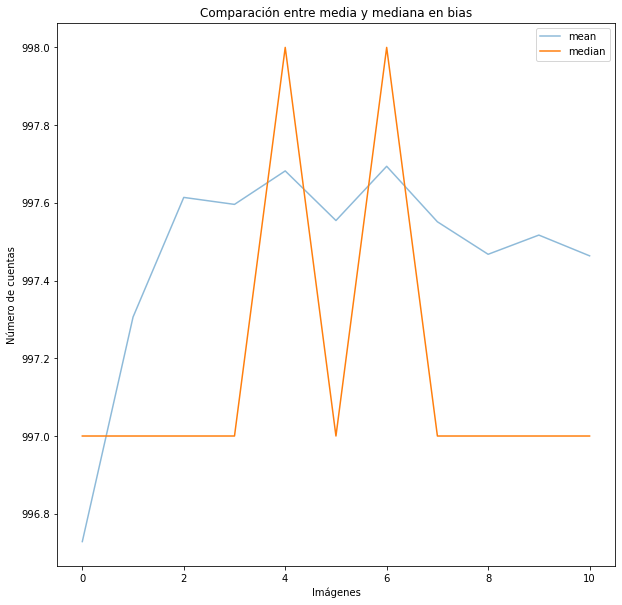

In [11]:
plt.figure("Bias", figsize=[10, 10])
plt.plot(np.arange(0,len(bias_list)),mean_bias, alpha=0.5, label='mean')
plt.plot(np.arange(0,len(bias_list)), median_bias, label='median')

plt.title('Comparación entre media y mediana en bias')
plt.xlabel('Imágenes')
plt.ylabel('Número de cuentas')
plt.legend()
#plt.imshow(stacked, vmin=1000, vmax=2000, origin='lower')
#plt.colorbar(label='Counts')
plt.show()

### Graficamos la desviación estándar

Al igual que con la media y la mediana vamos a representar la desviación estándar de los bias. La desviación estándar nos servirá para eliminar bias que tengan unos valores muy dispares en diferentes pixeles de la imagen, ya porque haya entrado luz a la hora de tomar estos bias o por lectura del sensor.  

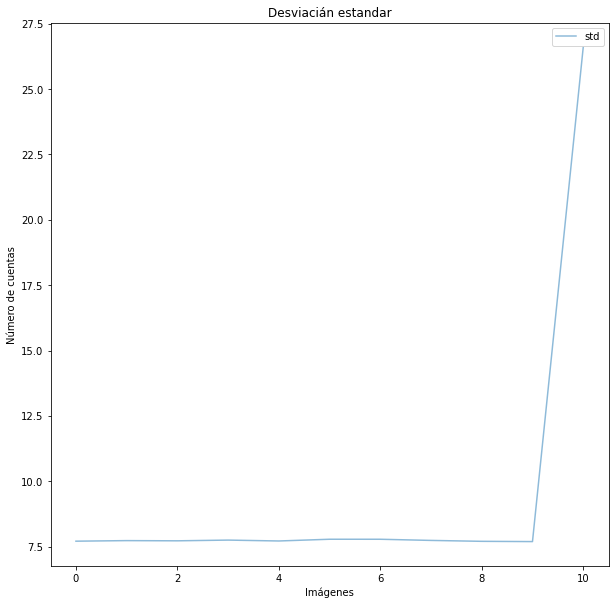

In [12]:
%matplotlib inline
plt.figure("Bias", figsize=[10, 10])
plt.plot(np.arange(0,len(bias_list)),std_bias, alpha=0.5, label='std')

plt.title('Desviacián estandar')
plt.xlabel('Imágenes')
plt.ylabel('Número de cuentas')
plt.legend()
#plt.imshow(stacked, vmin=1000, vmax=2000, origin='lower')
#plt.colorbar(label='Counts')
plt.show()

## Eliminación de los bias "extraños"

Hemos comprobado que hay *bias* que tienen valores en pixeles muy dispares. Vamos a eliminar aquellos que se encuentren por encima de un tanto por ciento del valor de la desviación estándar. En este caso eliminaremos los que tengan una desviación estándar mayor que un 20% (en total se elimina una imagen):

In [13]:
for r in range(len(bias_list)):
    if std_bias[r] > np.median(std_bias)*1.2:
        print(bias_list[r])
        bias_list.remove(bias_list[r])

imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0547_000001089.fit


Por tanto en ```bias_list``` tendremos nuestra nueva lista de *bias*, que serán los que usaremos para realizar el *superbias*.

In [14]:
bias_list

['imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0534_000001060.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0535_000001061.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0535_000001062.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0536_000001063.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0536_000001064.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0536_000001065.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0537_000001066.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0537_000001067.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0538_000001068.fit',
 'imagenes/calibracionImagenes/bias/Telescope3_BIAS_1x1_0s_-30degC_20200120_0538_000001069.fit']

### Graficamos de nuevo la desviación estándar

Aquí ya vemos la desviación estándar de cada bias, vemos que hay variaciones pequeñas por lo tanto los tendremos listos para generar el superbias.

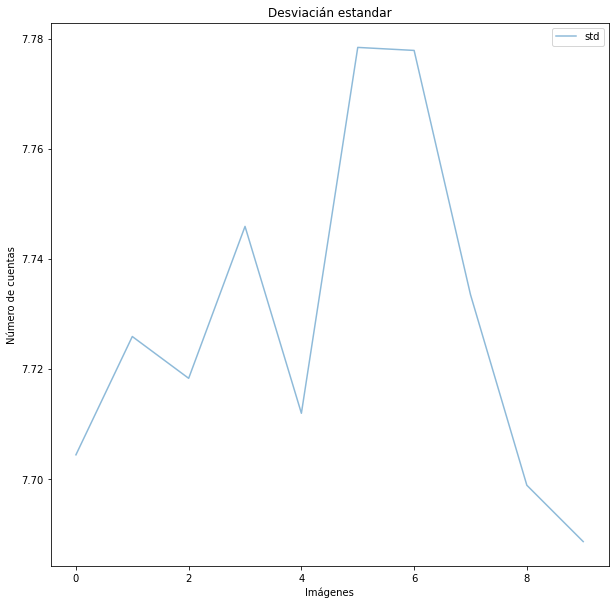

In [15]:
plt.figure("Bias", figsize=[10, 10])
plt.plot(np.arange(0,len(bias_list)),std_bias[:-1], alpha=0.5, label='std')

plt.title('Desviacián estandar')
plt.xlabel('Imágenes')
plt.ylabel('Número de cuentas')
plt.legend()
#plt.imshow(stacked, vmin=1000, vmax=2000, origin='lower')
#plt.colorbar(label='Counts')
plt.show()

## Creación del *superbias*

El *superbias* no es más que realizar una media o mediana de cada pixel en cada imagen. A este proceso se denomina *stacking*.

![](ficherosAuxiliares/stacking-images.jpg)
[Fuente de la imagen](https://nightskypix.com/astrophotography-stacking-software/)

Generamos una nueva lista donde se van a encontrar nuestros datos para realizar el stacking. Para ello abrimos los datos de los *bias* y se lo asignamos a esta nueva lista:

In [16]:
superBias = np.nanmedian(bias_data, axis=0)
bias_header[0]['history'] = f"Esta imagen es un stacking de {len(bias_list)} imagenes" 

In [17]:
bias_header[0]['history']

 Automated by CCD Commander
Esta imagen es un stacking de 10 imagenes

### Comprobamos el superbias

Una vez que hemos generado el superbias podemos comprobarlo tanto estadísticamente como gráficamente.

In [18]:
imstats(superBias)

{'npix': 16777216,
 'min': 972.0,
 'max': 1496.0,
 'mean': 997.3878480195999,
 'median': 997.0,
 'std': 3.2273289419778033}

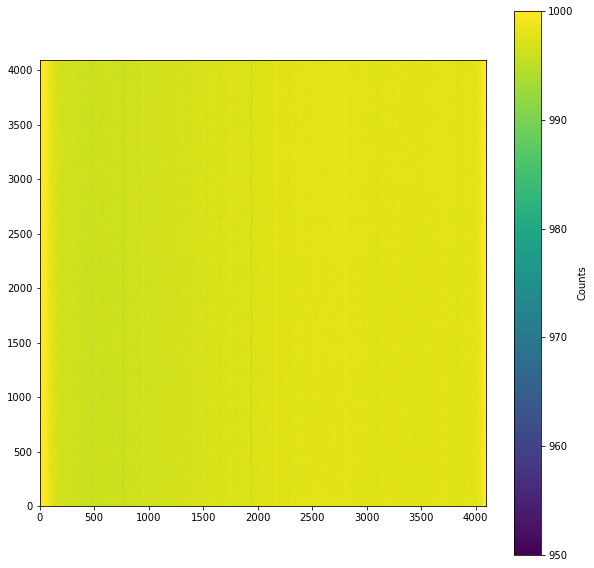

In [19]:
plt.figure("SuperBias", figsize=[10, 10])
plt.imshow(superBias, vmin=950, vmax=1000, origin='lower')
plt.colorbar(label='Counts')
plt.show()

## Guardado del *superbias*

Finalmente guardamos el *superbias* que hemos generado como un archivo ```FITS``` a través del método ```.PrimaryHDU()```

In [20]:
hdu_Bias = fits.PrimaryHDU(data=superBias.astype(np.float32), header=bias_header[0])
hdu_Bias.writeto(directorioCalibracion + "superBias.fit", overwrite=True)